# Algorithm implementation using packages

In [1]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%%capture
!pip install umap-learn

In [3]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.decomposition import FastICA
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
dataset_path = '/content/drive/MyDrive/datasets-assignment1/Electricity BILL.csv'

# In case of running the file locally
# df = pd.read_csv('Electricity BILL.csv')

df = pd.read_csv(dataset_path)

In [5]:
df.head()

Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

     Building_Status Maintenance_Priority  Energy_Per_SqM  \
0  Under Maintenance                 High      174.835708   
1  Under Maintenance                 High      143.086785   
2        Operational               Medium      182.384427   
3             Closed                  Low      226.151493   
4             Closed               Medium      138.292331   

   Number_of_Residents  Electricity_Bill  
0                  360      16408.008770  
1                   91      15230.425070  
2                  115       8117.632795  
3                  159      13030.707160  
4                  258      25848.853740

In [6]:
df.shape

(1250, 16)

In [7]:
# Checking for NULL values
na_counts = df.isna().sum()
print(na_counts)

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


In [8]:
# Checking for duplicates
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [9]:
X = df.drop('Electricity_Bill', axis=1)
y = df['Electricity_Bill']

In [10]:
# Splitting the dataset into 80:20 (train:test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1000
Testing set size: 250


#### a. Perform EDA by creating pair plots, box plots, violin plots, count plots for categorical features, and a correlation heatmap. Based on these visualizations, provide at least five insights on the dataset.

**Reference:**


*   [Greydon Gilmore](https://www.greydongilmore.com/courses/ml_intro/02_05_plotting_categorical/)


In [11]:
features = df.drop('Electricity_Bill', axis = 1)
categorical_features = df.select_dtypes(include=['object'])
categorical_features = pd.concat([categorical_features, df['Green_Certified']], axis=1)
categorical_columns = categorical_features.columns.tolist()
numerical_features = df.drop(columns=categorical_columns)

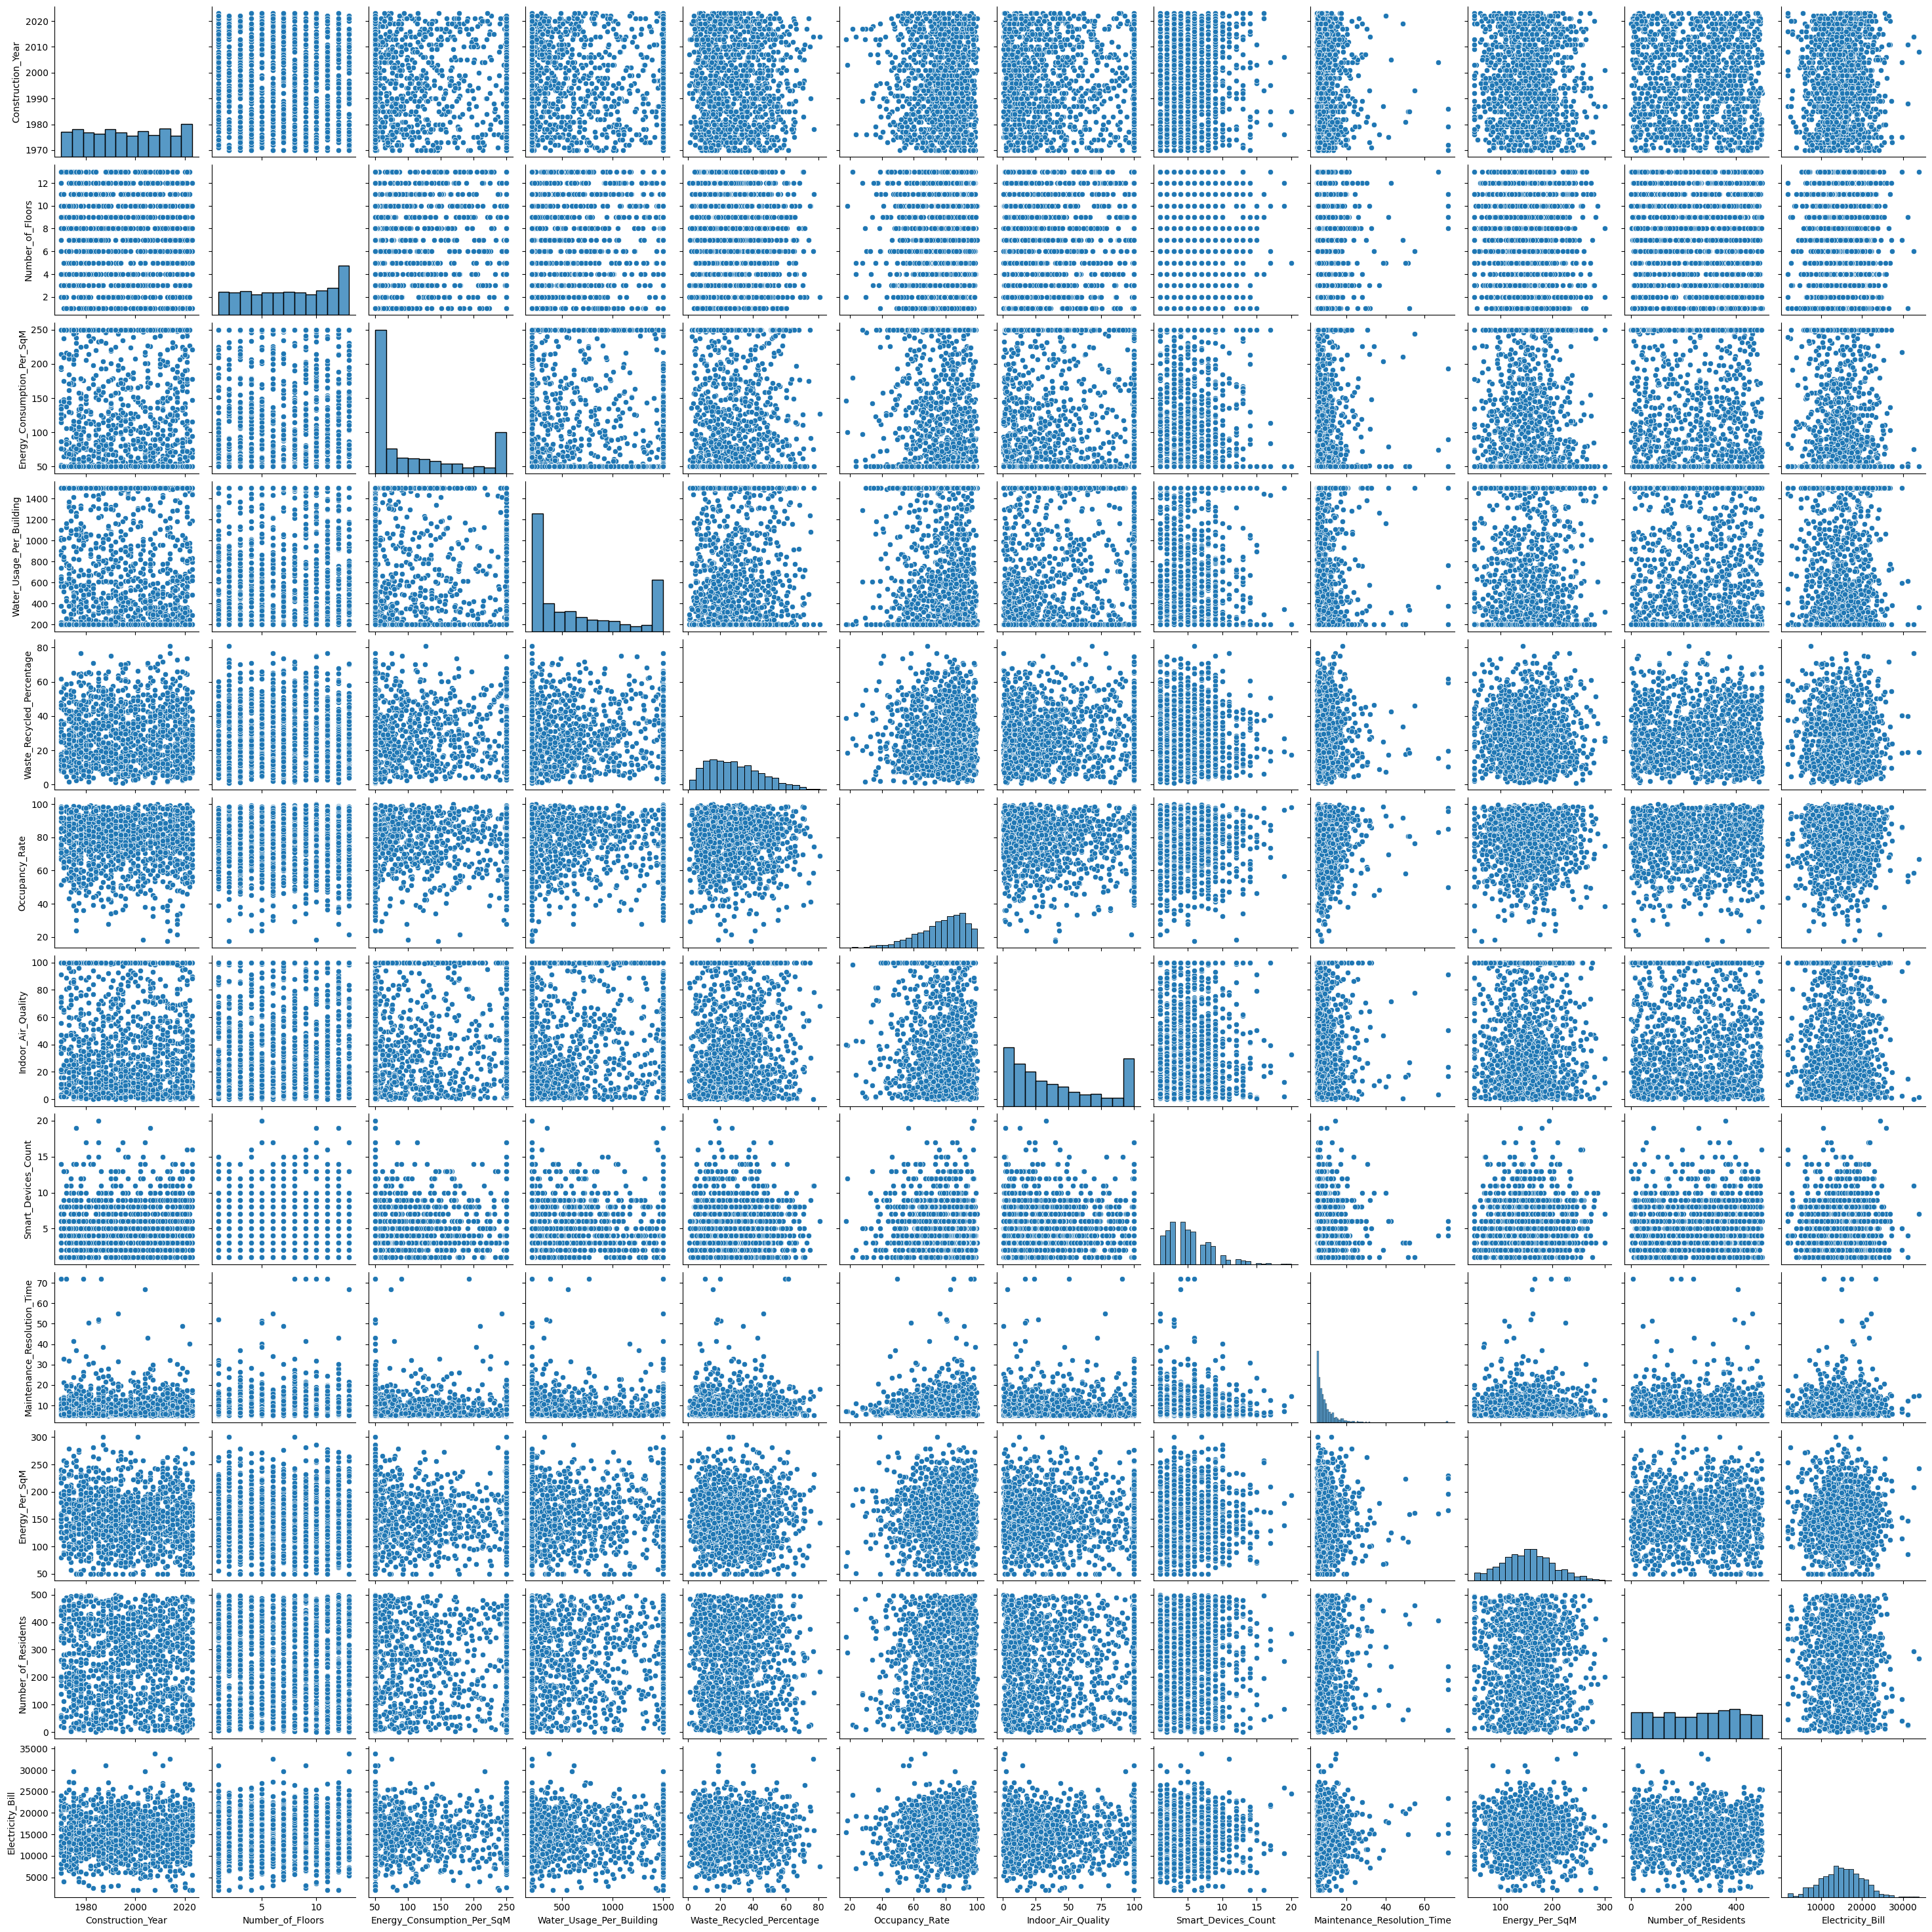

In [12]:
sns.pairplot(df, vars=numerical_features.columns.tolist())

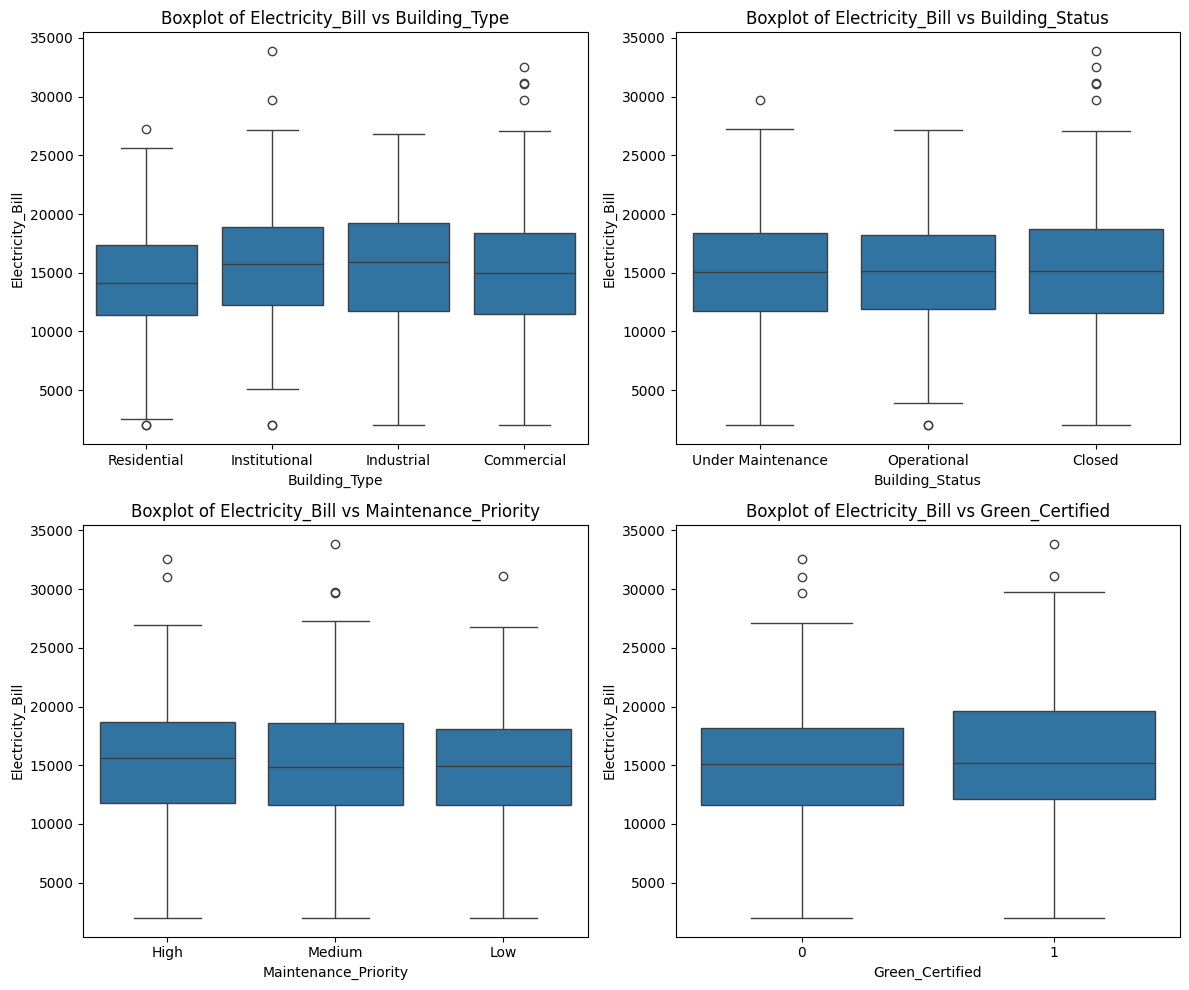

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(categorical_features.columns):
    sns.boxplot(x=feature, y='Electricity_Bill', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of Electricity_Bill vs {feature}')

plt.tight_layout()
plt.show()

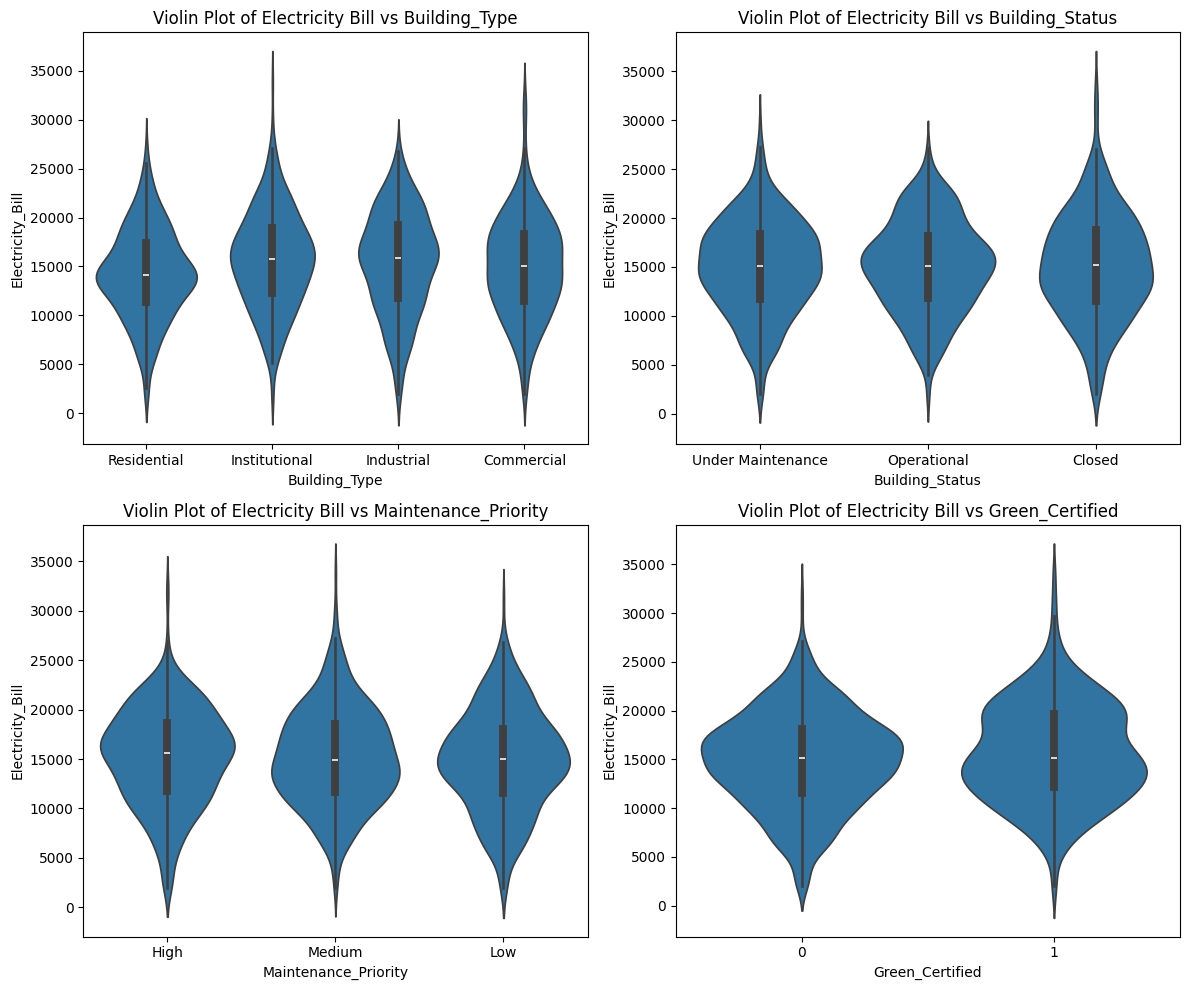

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(categorical_features.columns):
    sns.violinplot(x=feature, y='Electricity_Bill', data=df, ax=axes[i])
    axes[i].set_title(f'Violin Plot of Electricity Bill vs {feature}')

plt.tight_layout()
plt.show()

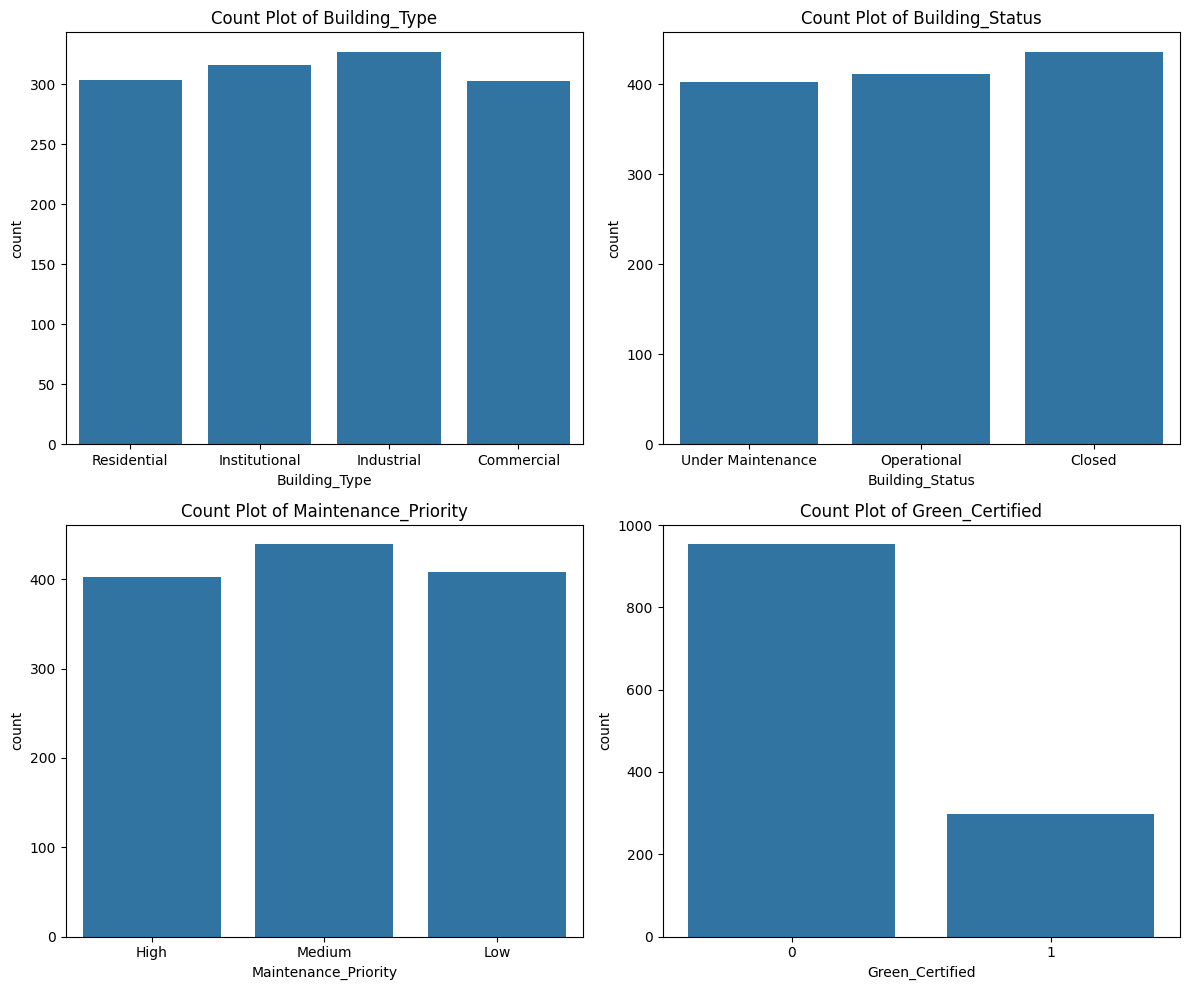

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(categorical_features.columns):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()

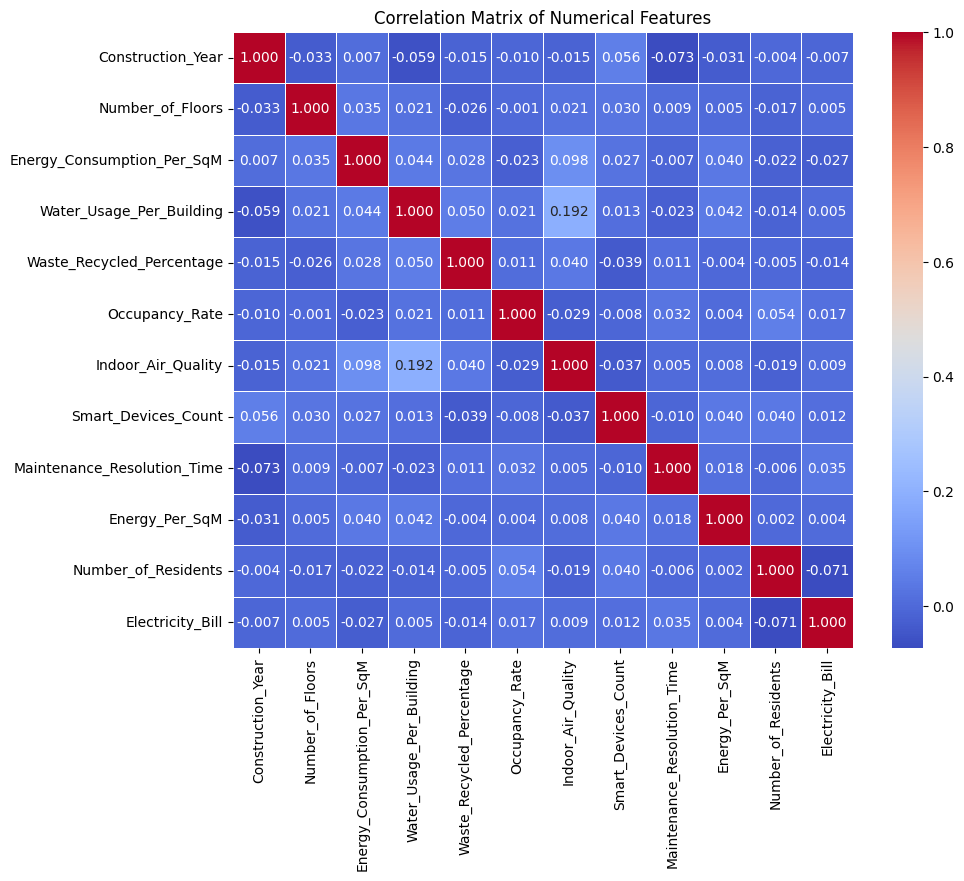

In [18]:
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Based on these visualizations, we get the following insights about our dataset:
1. From our pair plots, we notice no strong correlation between the features as the points are scattered randomly. We notice horizontal and vertical alignments for the features “Number_of_Floors” and “Smart_Devices_Count.” This indicates that these features are discrete categories. This represents a relationship between the discrete variable and the continuous variable. We noticed some of the points separated from the main cluster, indicating the presence of outliers in the data for these numerical features.
2. From the box plot, we notice outliers in our categorical features in their relationship with Electricity_Bill. We also see a higher range of electricity bills for buildings that are Green-Certified or Closed or of Institutional Type. The range for all bills based on maintenance priority is similar.
3. Our violin plot shows that the electricity bill is concentrated around the median for residential buildings, high-maintenance priority buildings, and buildings that are not green-certified. For other categories, the probability distribution is comparable.
4. From our count plots, we notice that the count of different categories in Building_Type, Building_status, and Maintenance_Priority are comparable, while more buildings are not green-certified compared to green-certified buildings.
5. From the diagonal of the pair plot, we notice that the Energy_Per_SqM and Electricity_Bill follow a normal distribution while others either follow a skewed distribution or have similar values.

#### b. Use the Uniform Manifold Approximation and Projection (UMAP) algorithm to reduce the data dimensions to 2 and plot the resulting data as a scatter plot. Comment on the separability and clustering of the data after dimensionality reduction.

**Reference:**


*   [GeeksForGeeks](https://www.geeksforgeeks.org/umap-uniform-manifold-approximation-and-projection/)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


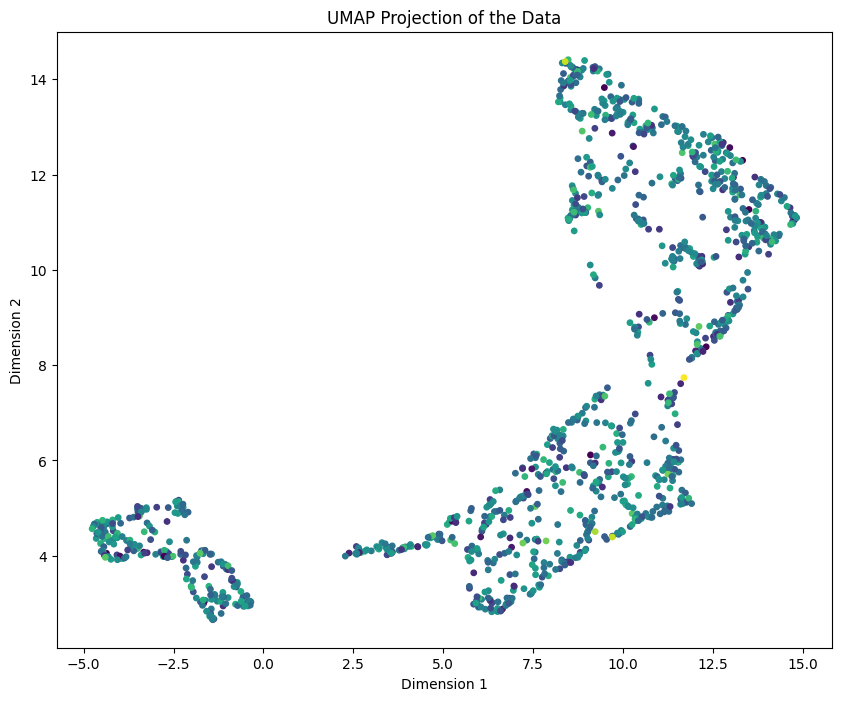

In [19]:
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data
X_umap = reducer.fit_transform(numerical_features.drop(columns=['Electricity_Bill']))

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Electricity_Bill'], cmap='viridis', s=15)
plt.title('UMAP Projection of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

From our UMAP plot, we notice two distinct clusters, indicating that the data has two significant groupings after dimensionality reduction. We also see some sub-clusters arising in the larger cluster, indicating the presence of sub-groups.

The smaller cluster is distinctly separated from the larger cluster, indicating that it is an entirely different group. Within the clusters, we notice that the sub-clusters are overlapping.

#### c. Perform the necessary pre-processing steps, including handling missing values and normalizing numerical features. For categorical features, use LabelEncoding. Apply Linear Regression on the preprocessed data. Report Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R2 score, Adjusted R2 score, and Mean Absolute Error (MAE) on the train and test data.

**Reference:**


*   [Stack Overflow](
https://stackoverflow.com/questions/47272033/standardization-before-or-after-categorical-encoding)


In [20]:
# Checking for NULL values
na_counts = df.isna().sum()
print(na_counts)

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


In [21]:
# Checking for duplicates
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


We see that there is no NULL values and duplicate values in our dataset. Hence, there is no need of data pre-processing. We normalise the data using StandardScaler after label encoding.

In [22]:
# Label Encoding
data_le = pd.read_csv('/content/drive/MyDrive/datasets-assignment1/Electricity BILL.csv')
le = LabelEncoder()
for col in categorical_columns:
    data_le[col] = le.fit_transform(data_le[col])
data_le.head()

Building_Type  Construction_Year  Number_of_Floors  \
0              3               1989                12   
1              2               1980                 6   
2              1               2006                10   
3              0               1985                 1   
4              1               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480       76.335921            1.519812   
4                  26.936862       96.511319            1.874753   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                    6                0                     7.211768   
1                   10                0                    34.139492   
2                    2                1                     6.224612   
3                    2                0                     5.327398   
4                   19                0                     7.060854   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  \
0                2                     0      174.835708                  360   
1                2                     0      143.086785                   91   
2                1                     2      182.384427                  115   
3                0                     1      226.151493                  159   
4                0                     2      138.292331                  258   

   Electricity_Bill  
0      16408.008770  
1      15230.425070  
2       8117.632795  
3      13030.707160  
4      25848.853740

In [23]:
X_le = data_le.drop('Electricity_Bill', axis=1)
y_le = data_le['Electricity_Bill']

In [24]:
# Splitting the dataset into 80:20 (train: test)
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

# Verify the sizes of each set
print(f"Training set size: {X_train_le.shape[0]}")
print(f"Testing set size: {X_test_le.shape[0]}")

Training set size: 1000
Testing set size: 250


In [25]:
scaler = StandardScaler()
X_train_le = pd.DataFrame(scaler.fit_transform(X_train_le), columns = X_train_le.columns)
X_train_le.head()

Building_Type  Construction_Year  Number_of_Floors  \
0       1.370953          -0.194382          1.300569   
1       0.468416          -0.830450          1.564216   
2       0.468416           0.505292         -0.808604   
3       1.370953          -1.466517         -1.599544   
4      -1.336656          -0.830450          1.036922   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.807078                 -0.121631   
1                   -0.807078                  0.685145   
2                   -0.807078                  1.783092   
3                   -0.807078                  1.139766   
4                    1.969636                 -0.829188   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   0.839266        0.198607           -1.022175   
1                  -0.842379       -1.119436           -1.144787   
2                   0.459648        0.858335           -0.941999   
3                  -1.063526       -0.210776            0.237029   
4                  -0.826465       -1.187105           -0.959913   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0            -0.060540        -0.548079                    -0.556191   
1            -0.681461        -0.548079                    -0.544184   
2             0.560381         1.824556                    -0.348638   
3            -0.681461         1.824556                     0.270676   
4             0.560381         1.824556                    -0.376221   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  
0         0.050190             -0.017106       -1.707263             1.485150  
1         0.050190             -0.017106        0.187861            -1.184261  
2         1.274336             -0.017106       -0.301689             0.541772  
3         1.274336              1.204767        1.261821             0.919123  
4         1.274336             -1.238979        1.925974            -1.491732

In [26]:
X_test_le = pd.DataFrame(scaler.transform(X_test_le), columns = X_test_le.columns)
X_test_le.head()

Building_Type  Construction_Year  Number_of_Floors  \
0       1.370953          -0.385202         -1.599544   
1       0.468416           0.060045          0.773276   
2      -0.434120           0.632505          0.773276   
3      -0.434120          -0.067169         -0.281311   
4      -1.336656           1.332180          0.245982   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                    1.969636                  0.472652   
1                    1.969636                  0.639978   
2                   -0.807078                 -0.910141   
3                   -0.807078                 -0.569778   
4                   -0.807078                 -0.701203   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   0.104308       -1.633727            1.387953   
1                  -1.133535       -0.407388           -1.139643   
2                  -0.737001        1.292975            0.935600   
3                  -0.869656       -2.558175           -0.108284   
4                  -0.926566        1.048053            0.296341   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0             0.560381        -0.548079                    -0.042437   
1             1.181303         1.824556                     0.063965   
2            -1.302382         1.824556                    -0.215350   
3             0.560381        -0.548079                    -0.560882   
4            -0.991922         1.824556                     2.192976   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  
0        -1.173956             -0.017106        0.713394             1.107799  
1         0.050190             -1.238979        2.142680             0.744423  
2         1.274336             -1.238979        1.192124             0.353096  
3         0.050190              1.204767       -0.621947            -0.723054  
4         1.274336             -1.238979       -0.240379            -0.639198

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train_le, y_train_le)

y_train_pred_le = lr_model.predict(X_train_le)
y_test_pred_le = lr_model.predict(X_test_le)

**Reference:**


*   [Stack Overflow](https://stackoverflow.com/questions/51038820/how-to-calculated-the-adjusted-r2-value-using-scikit)


In [28]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [29]:
def evaluate_metrics(X_train, X_test, y_train_pred, y_test_pred):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')


In [30]:
evaluate_metrics(X_train, X_test, y_train_pred_le, y_test_pred_le)

Train MSE: 24475013.16847547, Test MSE: 24278016.155742623
Train RMSE: 4947.222773281538, Test RMSE: 4927.272689403604
Train R2: 0.013922520844610209, Test R2: 3.7344733075372893e-05
Train Adjusted R2: -0.0011091480449536562, Test Adjusted R2: -0.0640628254763429
Train MAE: 4006.32846932936, Test MAE: 3842.4093125585155


#### d. Perform Recursive Feature Elimination (RFE) or Correlation analysis on the original dataset to select the 3 most important features. Train the regression model using the selected features. Compare the results (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the train and test dataset with the results obtained in part (c).

We select features using both RFE and Correlation Analysis. We see that they give similar results.

In [31]:
def train_and_evaluate_selected(lr_model, X_selected, y_le):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_le, test_size=0.2, random_state=42)
    lr_model.fit(X_train, y_train)

    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')

We first analyse our results by selecting top 3 features through RFE.

In [32]:
lr_model = LinearRegression()

rfe = RFE(estimator=lr_model, n_features_to_select=3)
rfe.fit(X_train_le, y_train_le)

selected_features = X_le.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

X_selected = X_le[selected_features]

Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')


In [33]:
train_and_evaluate_selected(lr_model, X_selected, y_le)

Train MSE: 24569032.906897984, Test MSE: 23941409.062998377
Train RMSE: 4956.715939702212, Test RMSE: 4892.995918964002
Train R2: 0.010134545491284008, Test R2: 0.01390151386794114
Train Adjusted R2: 0.007153023037944517, Test Adjusted R2: 0.0018759225736477703
Train MAE: 4006.4733775147365, Test MAE: 3813.948128176773


We now select top 3 features using correlation analysis.

In [34]:
correlation_matrix = data_le.corr()

correlation_with_target = correlation_matrix['Electricity_Bill'].abs().sort_values(ascending=False)

top_3_features_corr = correlation_with_target.index[1:4]
print(f"Selected Features: {top_3_features_corr}")

X_selected = X_le[top_3_features_corr]

Selected Features: Index(['Number_of_Residents', 'Green_Certified', 'Building_Type'], dtype='object')


In [35]:
train_and_evaluate_selected(lr_model, X_selected, y_le)

Train MSE: 24569032.90689799, Test MSE: 23941409.062998384
Train RMSE: 4956.715939702212, Test RMSE: 4892.995918964002
Train R2: 0.010134545491283897, Test R2: 0.013901513867940807
Train Adjusted R2: 0.007153023037944406, Test Adjusted R2: 0.0018759225736473262
Train MAE: 4006.473377514736, Test MAE: 3813.948128176773


By comparing the results of d with c, we notice that our model performs better during training for the model which is trained on all features, while our model performs better on test data when it is trained on the top 3 selected features. This gives the possibility of overfitting the model trained on all features and better generalizing the model trained on selected features.

#### e. Encode the categorical features of the original dataset using One-Hot Encoding and perform Ridge Regression on the preprocessed data. Report the evaluation metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE). Compare the results with those obtained in part (c).

In [36]:
data_ohe = pd.read_csv('/content/drive/MyDrive/datasets-assignment1/Electricity BILL.csv')

In [37]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = pd.DataFrame(onehot_encoder.fit_transform(data_ohe[categorical_columns]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
X_categorical_encoded.head()

0    1    2    3    4    5    6    7
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [39]:
df_encoded = pd.concat([data_ohe.drop(columns=categorical_columns), X_categorical_encoded], axis=1)
df_encoded.head()

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0               1989                12                   50.000000   
1               1980                 6                  225.759107   
2               2006                10                   98.755927   
3               1985                 1                   68.470692   
4               2006                12                   50.000000   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                477.681762                  48.417266       81.814110   
1                200.000000                  46.405516       45.109000   
2                200.000000                  17.247585       48.526225   
3                200.000000                  57.719480       76.335921   
4                347.093644                  26.936862       96.511319   

   Indoor_Air_Quality  Smart_Devices_Count  Maintenance_Resolution_Time  \
0           13.780635                    6                     7.211768   
1           10.177771                   10                    34.139492   
2           27.757026                    2                     6.224612   
3            1.519812                    2                     5.327398   
4            1.874753                   19                     7.060854   

   Energy_Per_SqM  Number_of_Residents  Electricity_Bill    0    1    2    3  \
0      174.835708                  360      16408.008770  0.0  0.0  1.0  0.0   
1      143.086785                   91      15230.425070  0.0  1.0  0.0  0.0   
2      182.384427                  115       8117.632795  1.0  0.0  0.0  1.0   
3      226.151493                  159      13030.707160  0.0  0.0  0.0  0.0   
4      138.292331                  258      25848.853740  1.0  0.0  0.0  0.0   

     4    5    6    7  
0  1.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  1.0  
3  0.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  0.0

In [40]:
X_ohe = df_encoded.drop('Electricity_Bill', axis=1)
y_ohe = df_encoded['Electricity_Bill']

In [41]:
# Splitting the dataset into 80:20 (train: test)
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

# Verify the sizes of each set
print(f"Training set size: {X_train_ohe.shape[0]}")
print(f"Testing set size: {X_test_ohe.shape[0]}")

Training set size: 1000
Testing set size: 250


In [42]:
# Convert column names to strings
X_train_ohe.columns = X_train_ohe.columns.astype(str)
X_test_ohe.columns = X_test_ohe.columns.astype(str)

scaler = StandardScaler()
X_train_ohe = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns = X_train_ohe.columns)
X_train_ohe.head()

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0          -0.194382          1.300569                   -0.807078   
1          -0.830450          1.564216                   -0.807078   
2           0.505292         -0.808604                   -0.807078   
3          -1.466517         -1.599544                   -0.807078   
4          -0.830450          1.036922                    1.969636   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                 -0.121631                   0.839266        0.198607   
1                  0.685145                  -0.842379       -1.119436   
2                  1.783092                   0.459648        0.858335   
3                  1.139766                  -1.063526       -0.210776   
4                 -0.829188                  -0.826465       -1.187105   

   Indoor_Air_Quality  Smart_Devices_Count  Maintenance_Resolution_Time  \
0           -1.022175            -0.060540                    -0.556191   
1           -1.144787            -0.681461                    -0.544184   
2           -0.941999             0.560381                    -0.348638   
3            0.237029            -0.681461                     0.270676   
4           -0.959913             0.560381                    -0.376221   

   Energy_Per_SqM  Number_of_Residents         0         1         2  \
0       -1.707263             1.485150 -0.589668 -0.581969  1.784405   
1        0.187861            -1.184261 -0.589668  1.718304 -0.560411   
2       -0.301689             0.541772 -0.589668  1.718304 -0.560411   
3        1.261821             0.919123 -0.589668 -0.581969  1.784405   
4        1.925974            -1.491732 -0.589668 -0.581969 -0.560411   

          3         4         5         6         7  
0  1.421671 -0.676554  1.424887 -0.720942 -0.548079  
1  1.421671 -0.676554  1.424887 -0.720942 -0.548079  
2 -0.703398  1.478078  1.424887 -0.720942  1.824556  
3 -0.703398  1.478078 -0.701810  1.387075  1.824556  
4 -0.703398  1.478078 -0.701810 -0.720942  1.824556

In [43]:
X_test_ohe = pd.DataFrame(scaler.transform(X_test_ohe), columns = X_test_ohe.columns)
X_test_ohe.head()

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0          -0.385202         -1.599544                    1.969636   
1           0.060045          0.773276                    1.969636   
2           0.632505          0.773276                   -0.807078   
3          -0.067169         -0.281311                   -0.807078   
4           1.332180          0.245982                   -0.807078   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                  0.472652                   0.104308       -1.633727   
1                  0.639978                  -1.133535       -0.407388   
2                 -0.910141                  -0.737001        1.292975   
3                 -0.569778                  -0.869656       -2.558175   
4                 -0.701203                  -0.926566        1.048053   

   Indoor_Air_Quality  Smart_Devices_Count  Maintenance_Resolution_Time  \
0            1.387953             0.560381                    -0.042437   
1           -1.139643             1.181303                     0.063965   
2            0.935600            -1.302382                    -0.215350   
3           -0.108284             0.560381                    -0.560882   
4            0.296341            -0.991922                     2.192976   

   Energy_Per_SqM  Number_of_Residents         0         1         2  \
0        0.713394             1.107799 -0.589668 -0.581969  1.784405   
1        2.142680             0.744423 -0.589668  1.718304 -0.560411   
2        1.192124             0.353096  1.695868 -0.581969 -0.560411   
3       -0.621947            -0.723054  1.695868 -0.581969 -0.560411   
4       -0.240379            -0.639198 -0.589668 -0.581969 -0.560411   

          3         4         5         6         7  
0 -0.703398 -0.676554  1.424887 -0.720942 -0.548079  
1  1.421671 -0.676554 -0.701810 -0.720942  1.824556  
2 -0.703398  1.478078 -0.701810 -0.720942  1.824556  
3  1.421671 -0.676554 -0.701810  1.387075 -0.548079  
4 -0.703398  1.478078 -0.701810 -0.720942  1.824556

In [44]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_ohe, y_train_ohe)

y_train_pred_ohe = ridge_model.predict(X_train_ohe)
y_test_pred_ohe = ridge_model.predict(X_test_ohe)

In [45]:
evaluate_metrics(X_train_ohe, X_test_ohe, y_train_pred_ohe, y_test_pred_ohe)

Train MSE: 24188925.91329433, Test MSE: 24129688.934199765
Train RMSE: 4918.223857582565, Test RMSE: 4912.1979738402
Train R2: 0.02544873320926233, Test R2: 0.00614664465902004
Train Adjusted R2: 0.006554371914339829, Test Adjusted R2: -0.0759542846952348
Train MAE: 3976.6837323582586, Test MAE: 3797.462833733082


We notice that our model trained using Ridge Regression with one hot encoding performs better than the model trained using Linear Regression with label encoding. This is likely due to Ridge’s regularization, which mitigates overfitting by shrinking less important feature weights.

#### f. Perform Independent Component Analysis (ICA) on the one-hot encoded dataset and choose the appropriate number of components (try 4, 5, 6, and 8 components). Compare the results (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the train and test dataset.

In [46]:
def train_and_evaluate(n_components, X_train = X_train_ohe, X_test = X_test_ohe, y_train = y_train_ohe, y_test = y_test_ohe):
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_ica, y_train)

    y_train_pred = model.predict(X_train_ica)
    y_test_pred = model.predict(X_test_ica)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_ica.shape[1] - 1)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test_ica.shape[1] - 1)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    print(f"Components: {n_components}")
    print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")
    print(f"Train Adjusted R2: {adj_r2_train:.4f}, Test Adjusted R2: {adj_r2_test:.4f}")
    print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print("\n")

In [47]:
train_and_evaluate(4)
train_and_evaluate(5)
train_and_evaluate(6)
train_and_evaluate(8)

Components: 4
Train MSE: 24589773.9306, Test MSE: 24232749.7311
Train RMSE: 4958.8077, Test RMSE: 4922.6771
Train R2: 0.0093, Test R2: 0.0019
Train Adjusted R2: 0.0053, Test Adjusted R2: -0.0144
Train MAE: 3978.0974, Test MAE: 3802.1953


Components: 5
Train MSE: 24588480.2463, Test MSE: 24254297.9900
Train RMSE: 4958.6773, Test RMSE: 4924.8653
Train R2: 0.0094, Test R2: 0.0010
Train Adjusted R2: 0.0044, Test Adjusted R2: -0.0195
Train MAE: 3978.7462, Test MAE: 3804.2047


Components: 6
Train MSE: 24587094.9113, Test MSE: 24236046.1667
Train RMSE: 4958.5376, Test RMSE: 4923.0119
Train R2: 0.0094, Test R2: 0.0018
Train Adjusted R2: 0.0034, Test Adjusted R2: -0.0229
Train MAE: 3978.8786, Test MAE: 3802.7388


Components: 8
Train MSE: 24379674.0159, Test MSE: 24235407.5064
Train RMSE: 4937.5777, Test RMSE: 4922.9470
Train R2: 0.0178, Test R2: 0.0018
Train Adjusted R2: 0.0098, Test Adjusted R2: -0.0313
Train MAE: 3976.0493, Test MAE: 3800.5082




We notice that the model performs better for the training dataset as the number of components increases, but there is no noticeable trend between the performance of the model and the number of components for the training dataset. This might indicate that while more number of components capture the complexity of the data, it might not necessarily generalise well on unseen data.

#### g. Use ElasticNet regularization (which combines L1 and L2) while training a linear model on the preprocessed dataset from part (c). Compare the evaluation metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the test dataset for different values of the mixing parameter (alpha).

In [48]:
def train_and_evaluate_elasticnet(alpha, l1_ratio, X_train = X_train_le, X_test = X_test_le, y_train = y_train_le, y_test = y_test_le):
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    elasticnet_model.fit(X_train, y_train)

    y_test_pred = elasticnet_model.predict(X_test)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
    print(f"Test MSE: {mse_test:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")
    print(f"Test R2: {r2_test:.4f}")
    print(f"Test Adjusted R2: {adj_r2_test:.4f}")
    print(f"Test MAE: {mae_test:.4f}")
    print("\n")

In [49]:
alpha_values = [0.0001, 0.0005, 0.001, 0.01]
l1_ratio = 0.5

length = 4
for i in range(length):
    train_and_evaluate_elasticnet(alpha_values[i], l1_ratio)

Alpha: 0.0001, L1 Ratio: 0.5
Test MSE: 24278004.4327
Test RMSE: 4927.2715
Test R2: 0.0000
Test Adjusted R2: -0.0641
Test MAE: 3842.4075


Alpha: 0.0005, L1 Ratio: 0.5
Test MSE: 24277957.5702
Test RMSE: 4927.2667
Test R2: 0.0000
Test Adjusted R2: -0.0641
Test MAE: 3842.4001


Alpha: 0.001, L1 Ratio: 0.5
Test MSE: 24277899.0563
Test RMSE: 4927.2608
Test R2: 0.0000
Test Adjusted R2: -0.0641
Test MAE: 3842.3908


Alpha: 0.01, L1 Ratio: 0.5
Test MSE: 24276857.8940
Test RMSE: 4927.1552
Test R2: 0.0001
Test Adjusted R2: -0.0640
Test MAE: 3842.2250




We notice that with a constant L1 ratio and increasing learning rate, the model performs better on the testing dataset, which means that it can generalize well on unseen data.

#### h. Use the Gradient Boosting Regressor to perform regression on the preprocessed dataset from part (c). Report the evaluation metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE). Compare the results with those obtained in parts (c) and (g).

In [50]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_le, y_train_le)

y_train_pred_le = gbr.predict(X_train_le)
y_test_pred_le = gbr.predict(X_test_le)

In [51]:
print("Gradient Boosting Regressor Results")
evaluate_metrics(X_train_le, X_test_le, y_train_pred_le, y_test_pred_le)

Gradient Boosting Regressor Results
Train MSE: 14926446.25730777, Test MSE: 24405496.61674575
Train RMSE: 3863.4759294329465, Test RMSE: 4940.1919615279885
Train R2: 0.398626166333897, Test R2: -0.005213319055167753
Train Adjusted R2: 0.38945888228410885, Test Adjusted R2: -0.06965007027665293
Train MAE: 3092.748188686501, Test MAE: 3813.630549423027


We notice that GBR model performs significantly better than the models used in c and g part on the training dataset but it performs slightly worse than both the models on the testing dataset.